In [53]:
import pandas as pd
import numpy as np
from pathlib import Path
import curveball
from matplotlib import pyplot as plt

# Estimate growth rates from growth curves
Note: Run in conda environment with curveball

In [54]:
folder = Path('../../../data/vila_2023/')
# Growth data
growth_fn = folder / 'Targeted_LCMS_Growth_Curves.csv'
growth_df= pd.read_csv(growth_fn)
growth_df.replace('Psuedomonas', 'Pseudomonas', inplace=True)

peak_df = pd.read_csv(folder / 'growth_curves_peaktimes.csv', index_col=0)

In [55]:
def store_results(strain, cs, well, model_fits = None, idx = None):
    res = {}
    # res['folder'] = os.path.dirname(filepath)
    # res['filename'] = os.path.splitext(os.path.basename(fn))[0]
    res['Strain'] = strain
    res['Carbon source'] = cs
    res['Well'] = well
    
   
    curr_idx = idx
    if model_fits:
        mu = np.nan
        while np.isnan(mu):
            # print(s, cs, idx)
            fit = model_fits[idx]
            res['model'] = fit.model.name
            res['RSS'] = fit.chisqr
            res['RMSD'] = np.sqrt(res['RSS'] / fit.ndata)
            # res['NRMSD'] = res['RMSD'] / (strain_df.OD.max() - strain_df.OD.min())
            # res['CV(RMSD)'] = res['RMSD'] / (strain_df.OD.mean())
            res['bic'] = fit.bic
            res['aic'] = fit.aic
            res['weighted_bic'] = fit.weighted_bic
            res['weighted_aic'] = fit.weighted_aic
            params = fit.params
            res['y0'] = params['y0'].value
            res['K'] = params['K'].value
            res['r'] = params['r'].value
            res['nu'] = params['nu'].value if 'nu' in params else 1
            res['q0'] = params['q0'].value if 'q0' in params else 0
            res['v'] = params['v'].value if 'v' in params else 0
            res['has_lag'] = curveball.models.has_lag(model_fits)
            res['has_nu'] = curveball.models.has_nu(model_fits)
            res['max_growth_rate'] = curveball.models.find_max_growth(fit)[-1]
            res['min_doubling_time'] = curveball.models.find_min_doubling_time(fit)
            res['lag'] = curveball.models.find_lag(fit)
            mu = res['max_growth_rate']
            if idx == curr_idx:
                idx = 0
                curr_idx = np.inf
            else:
                idx += 1
        
            if idx >= len(model_fits):
                print('No growth rate found')
                break
    return res

In [56]:
well_to_PT = peak_df.set_index('Well')['Peak time'].to_dict()

In [57]:
len(well_to_PT)

88

In [58]:
well_to_PT['C04']

48.0

No growth for A01
No growth for B01
No growth for C01
No growth for D01


/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")


No growth rate found


/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")
/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")
/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/baranyi_roberts_model.py:125: RuntimeWarning: overflow encountered in exp
  At = t + (1.0 / v) * np.log((np.exp(-v * t) + q0) / (1.0 + q0))


No growth rate found


/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")
/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/baranyi_roberts_model.py:125: RuntimeWarning: overflow encountered in exp
  At = t + (1.0 / v) * np.log((np.exp(-v * t) + q0) / (1.0 + q0))


No growth rate found


/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")
/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")
/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/baranyi_roberts_model.py:125: RuntimeWarning: overflow encountered in exp
  At = t + (1.0 / v) * np.log((np.exp(-v * t) + q0) / (1.0 + q0))


No growth rate found


/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")
/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/baranyi_roberts_model.py:125: RuntimeWarning: overflow encountered in exp
  At = t + (1.0 / v) * np.log((np.exp(-v * t) + q0) / (1.0 + q0))


No growth rate found
No growth for E01
No growth for F01
No growth for G01
No growth for H01


/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")


No growth rate found


/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")
/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/baranyi_roberts_model.py:125: RuntimeWarning: overflow encountered in exp
  At = t + (1.0 / v) * np.log((np.exp(-v * t) + q0) / (1.0 + q0))


No growth rate found


/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")
/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/baranyi_roberts_model.py:125: RuntimeWarning: overflow encountered in exp
  At = t + (1.0 / v) * np.log((np.exp(-v * t) + q0) / (1.0 + q0))


No growth rate found


/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")
/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")
/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/baranyi_roberts_model.py:125: RuntimeWarning: overflow encountered in exp
  At = t + (1.0 / v) * np.log((np.exp(-v * t) + q0) / (1.0 + q0))


No growth rate found


/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")
/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/baranyi_roberts_model.py:125: RuntimeWarning: overflow encountered in exp
  At = t + (1.0 / v) * np.log((np.exp(-v * t) + q0) / (1.0 + q0))


No growth rate found


/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")
/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/baranyi_roberts_model.py:125: RuntimeWarning: overflow encountered in exp
  At = t + (1.0 / v) * np.log((np.exp(-v * t) + q0) / (1.0 + q0))


No growth rate found


/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")
/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/baranyi_roberts_model.py:125: RuntimeWarning: overflow encountered in exp
  At = t + (1.0 / v) * np.log((np.exp(-v * t) + q0) / (1.0 + q0))


No growth rate found


/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/models.py:640: UserWarning: All values are below K/e
  warn("All values are below K/e")
/Users/snorre/miniconda3/envs/curveball/lib/python3.11/site-packages/curveball/baranyi_roberts_model.py:125: RuntimeWarning: overflow encountered in exp
  At = t + (1.0 / v) * np.log((np.exp(-v * t) + q0) / (1.0 + q0))


No growth rate found


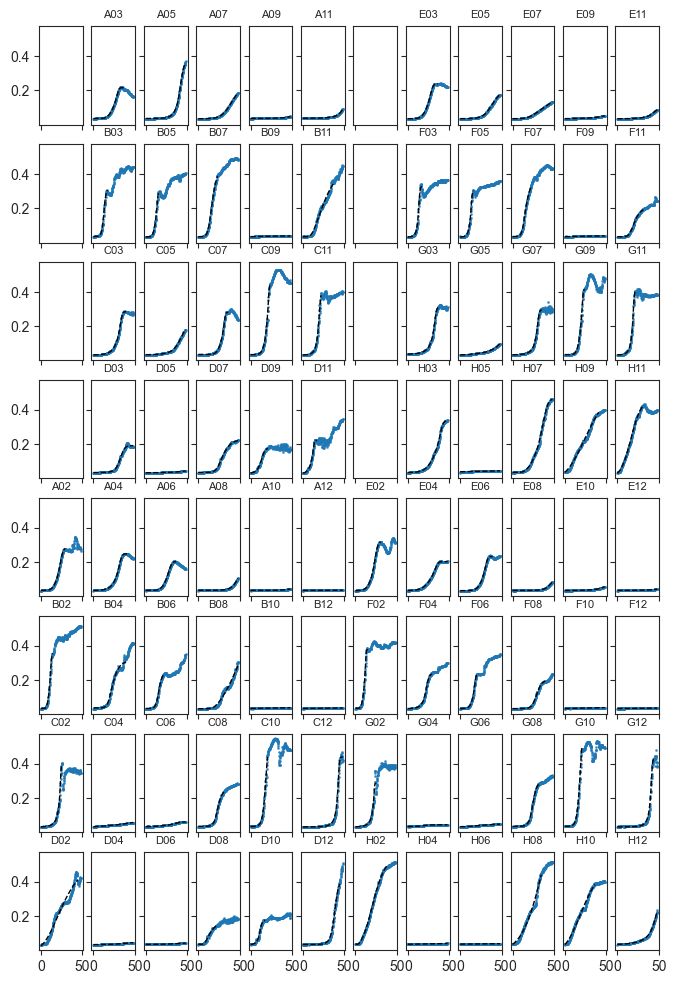

In [59]:
time_buffer = 2
list_of_dicts = []
fig, axes = plt.subplots(8, 12, figsize=(8, 12), sharex=True, sharey=True)
axes = axes.T.flatten()
for i, w in enumerate(growth_df.Well.unique()):
    try:
        peak_time = well_to_PT[w]
    except KeyError:
        print(f'No growth for {w}')
        continue
    ax = axes[i]
    # Get the growth data for this well
    dfw = growth_df[growth_df.Well == w]
    s = dfw['Strain'].values[0]
    cs = dfw['Carbon_Source'].values[0]

    dfit = dfw.loc[dfw['Time']<=peak_time+time_buffer,:].copy()
    dfit.dropna(inplace=True)
    model_fit = curveball.models.fit_model(dfit, PRINT=False, PLOT = False, models = None)

    bri_idx = 0 # Use best fit
    t = np.linspace(0, model_fit[bri_idx].userkws['t'].max())
    y_pred = model_fit[bri_idx].model.eval(t=t, params=model_fit[bri_idx].params)
                
    # Plot the data
    ax.scatter(dfw['Time'], dfw['OD'], s = 1, alpha = 0.7, c = f'C{0}')

    ax.plot(t,y_pred, c = 'k', ls = '--', lw = 1)
    ax.set_title(w, fontsize = 8)
    
    # Store results 
    dic = store_results(s, cs, w, model_fit, bri_idx)
    list_of_dicts.append(dic)
# row +=1
plt.show()

In [60]:
res_df = pd.DataFrame(list_of_dicts)

In [61]:
res_df.to_csv(folder / 'growth_curves_fits.csv')